# Data and plots for fig. 2

Fig. 2 is about the substrate effects and introducing spot profile helium diffraction. 

 - Diffraction from bulk MoS2
 - No diffraction from monolayer MoS2
 - Diffraction from MoS2 on hBN
 - 2D scans?

## Background signal

To do a background correction on the 2D scan I use a alternative scan from a different data set - I don't think we need to use this for these plot...

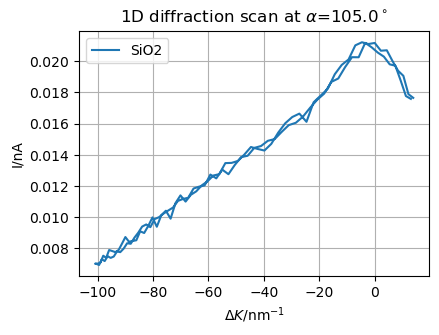

In [21]:
path_name='2023_09_defect_MoS2_5um_hbn_sub'

# I will use this scan for normalisation later in the script
file_ind=[7, 22, 6, 21, 5, 20, 4, 19, 2, 18, 8, 17, 9, 16, 10, 15, 11]
z_zero = 1.3e6
d = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero)
_, _, b = d.line_plot_diffraction(105, scan=2, label='SiO2')

## Bulk 2D scan hi-res

This is the highest resolution (and generally best quality) 2D scan we have, it was taken at 160C on a sample that was defected (to a presently unknown degree). I am now thinking we won't include it, but we could.

/home/sam/repositories/mos2-defects/defect_mos2_data_alek_vivian/figure 2/shem_spot_profile.py:1080: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh1 = ax1.pcolormesh(sP.alpha*pi/180, getattr(sP, var), Z,


(<Figure size 800x600 with 3 Axes>,
 <PolarAxes: xlabel='$\\alpha$'>,
 <Axes: ylabel='$\\log_{10}(I/\\mathrm{nA})$'>)

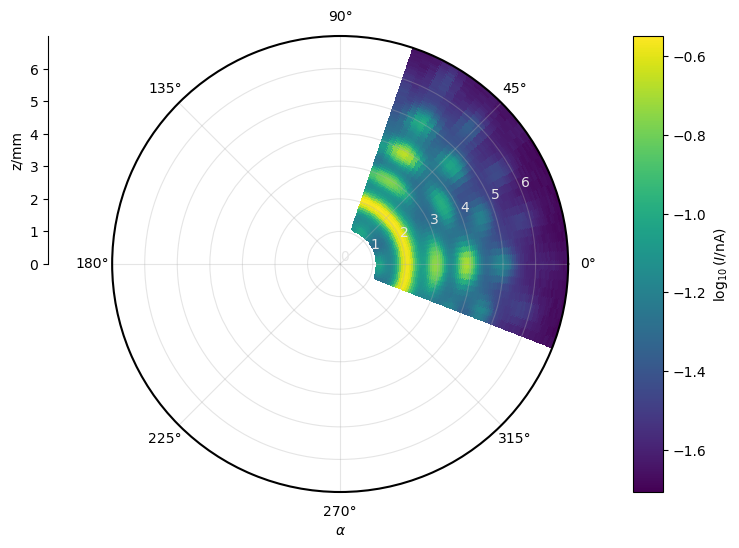

In [22]:
path_name='2023_07_MoS2_5um'

file_ind = np.arange(2102,2138+1)
z_zero = 1.15e6
d_bulk = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=65)

d_bulk.shem_raw_plot()
#d_bulk.signal

Line scan along the principle azimuth - again, I don't think we are going to use this...

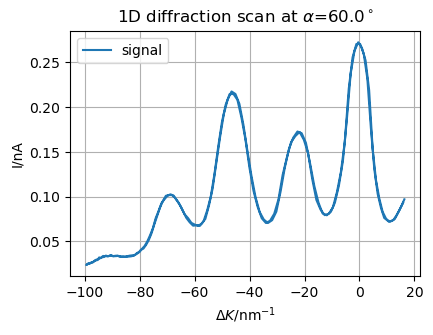

In [23]:
bulk_line = d_bulk.line_plot_diffraction(60)

### Normalised 2D plot

In order to make a nice looking 2D plot normalise by the intensity of the specular peak - this is not completely unreasonable, but is not quantativily a good idea (maybe I can do the same thing I do with the temperature data). Since the aim is simply to make the 2D plot look nice I think it is ok.

/home/sam/repositories/mos2-defects/defect_mos2_data_alek_vivian/figure 2/shem_spot_profile.py:1080: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh1 = ax1.pcolormesh(sP.alpha*pi/180, getattr(sP, var), Z,


(<Figure size 800x600 with 3 Axes>,
 <PolarAxes: xlabel='$\\alpha$'>,
 <Axes: ylabel='$\\log_{10}(I/\\mathrm{nA})$'>)

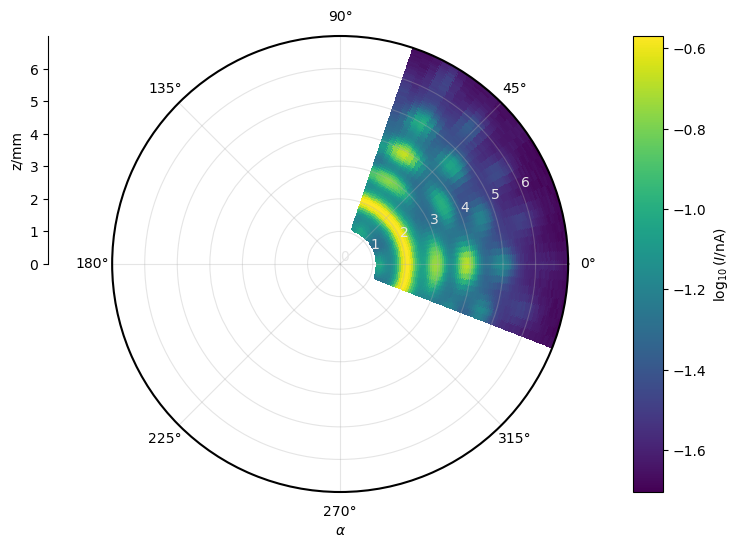

In [24]:
d_bulk2 = copy.deepcopy(d_bulk)

I = d_bulk2.signal
n = np.shape(I)[2]
N = np.max(I[0][:,0])

for i in range(n): 
    I_tmp = I[0][:,i]
    N_tmp = np.max(I_tmp)
    I_tmp = I_tmp*N/N_tmp
    I[0][:,i] = I_tmp

d_bulk2.signal = I
d_bulk2.shem_raw_plot()

(<Figure size 800x600 with 3 Axes>,
 <PolarAxes: xlabel='$\\alpha$'>,
 <Axes: ylabel='$\\log_{10}(I/\\mathrm{nA})$'>)

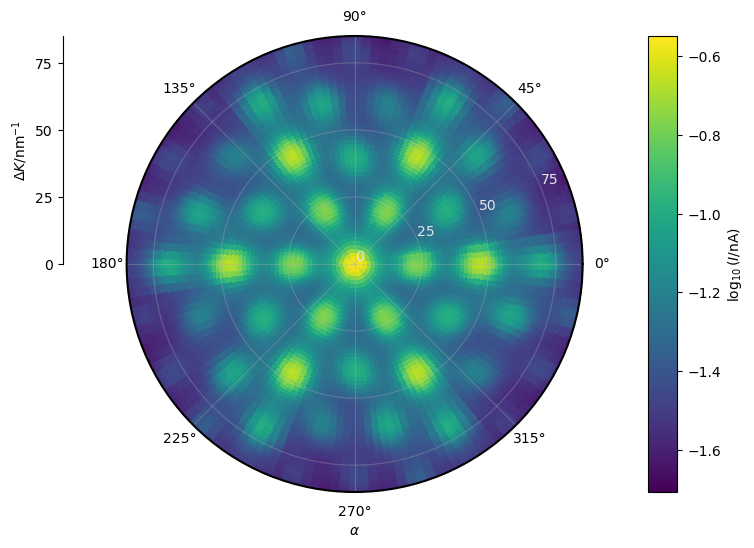

In [25]:

d_360 = d_bulk.wrap_around(60.0, crop="end")
d_360.set_alpha_zero(0) # This is dodgy... why does it work
d_360.shem_diffraction_plot()

#d_360_2 = d_bulk2.wrap_around(60.0, crop="end")
#d_360_2.set_alpha_zero(0) # This is dodgy... why does it work
#d_360_2.shem_diffraction_plot()

## Sample with lots of different parts to it

This sample is pristine and has lots of different parts on the same patch: MoS2-SiO2, MoS2-hBN-SIO2, bulk MoS2 (and hBN).


Regions on this sample:
![title](sample_regions_flake.png)
![title](sample_regions_flake_optical.png)
The purple is the monolayer MoS2 (darker being a few monolayers), the blue in the middle is hBN below the MoS2, the blue regions on the edge are bulk MoS2. 

There are a number of 2D scans taken on this sample - need to identify these with specific points on the above flake of interest.

We want to identify line scans of
 - Bulk MoS2, principle azimuth
 - Monolayer MoS2, principle azimuth
 - MoS2-SiO2
 
### List of 2D scans taken on this sample:
#### diff2D000016
example_pos: [-3470000 316000 -1000000]  
date_time: [2023 8 29 1 18 21.0897]  
files: 2506:2554  
alphas: 30:2.5:150  
#### diff2D000015
example_pos: [-3470000 316000 -1000000]  
date_time: [2023 8 28 1 14 56.0913]  
files: 2457:2505  
alphas: 30:2.5:150  
#### diff2D000014
example_pos: [-3470000 316000 -1000000]  
date_time: [2023 8 23 12 5 1.8387]  
files: 2432:2456  
alphas: 30:5:150  
#### diff2D000013
example_pos: [-3420000 262000 -1000000]  
date_time: [2023 8 22 10 54 35.9771]  
files: 2394:2430  
alphas: 45:2.5:135  
#### diff2D000011
example_pos: [-3468000 316000 -1000000]  
date_time: [2023 8 22 0 9 16.0698]  
files: 2356:2392  
alphas: 45:2.5:135  
#### diff2D000010
example_pos: [-3468000 316000 -1000000]  
date_time: [2023 8 21 20 15 19.1603]  
files: 2318:2354  
alphas: 45:2.5:135  

Unfortunatly I have no way of knowing on what part of the sample these were taken on because the lab book is non-existent!!!!

### Available images on this sample


(<Figure size 800x600 with 3 Axes>,
 <PolarAxes: xlabel='$\\alpha$'>,
 <Axes: ylabel='$\\log_{10}(I/\\mathrm{nA})$'>)

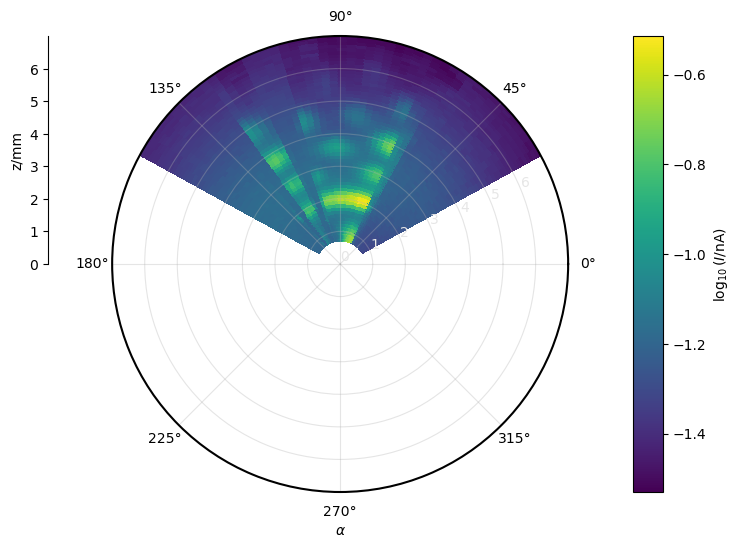

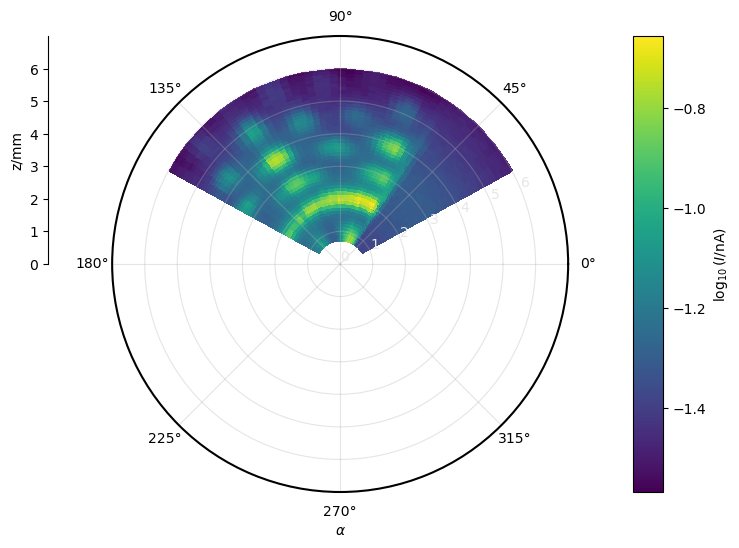

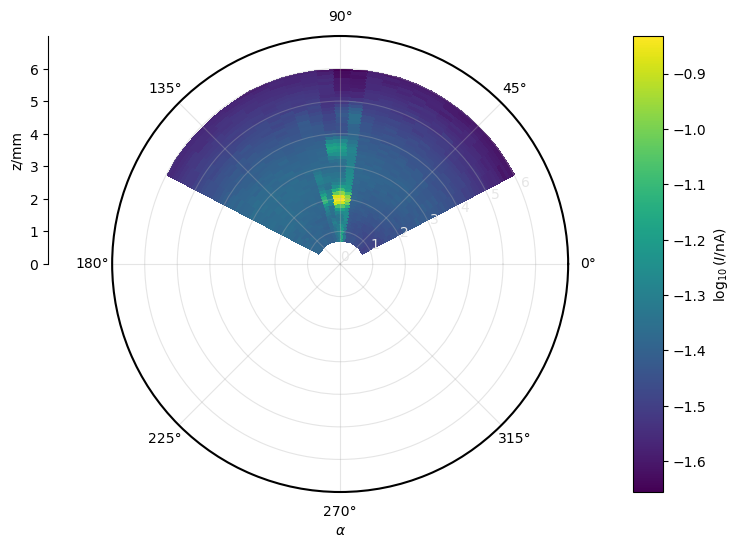

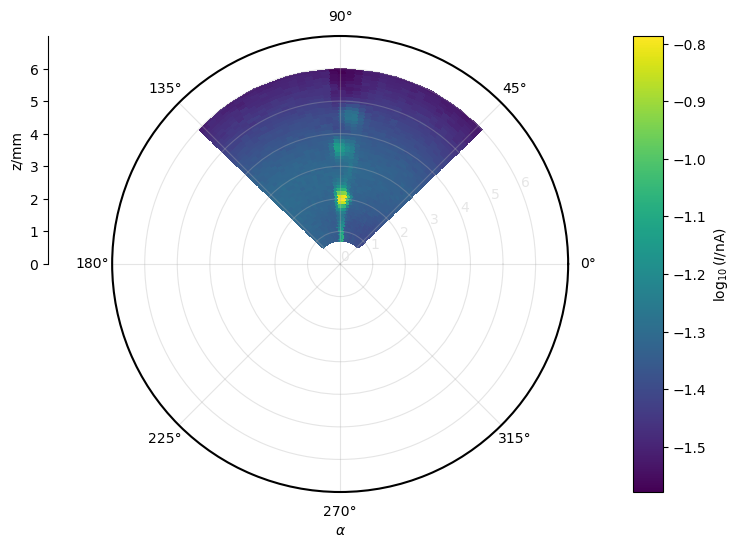

In [29]:
path_name = "2023_08_MoS2_5um_hbn_sub"

file_ind = np.arange(2506, 2554 + 1)
z_zero = 1.0e6
d1 = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=0)

file_ind = np.arange(2457, 2505+1)
d2 = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=0)

file_ind = np.arange(2432, 2456+1)
d3 = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=0)

file_ind = np.arange(2394, 2430+1)
d4 = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=0)

d1.shem_raw_plot()
d2.shem_raw_plot()
d3.shem_raw_plot()
d4.shem_raw_plot()

(<Figure size 800x600 with 3 Axes>,
 <PolarAxes: xlabel='$\\alpha$'>,
 <Axes: ylabel='$\\log_{10}(I/\\mathrm{nA})$'>)

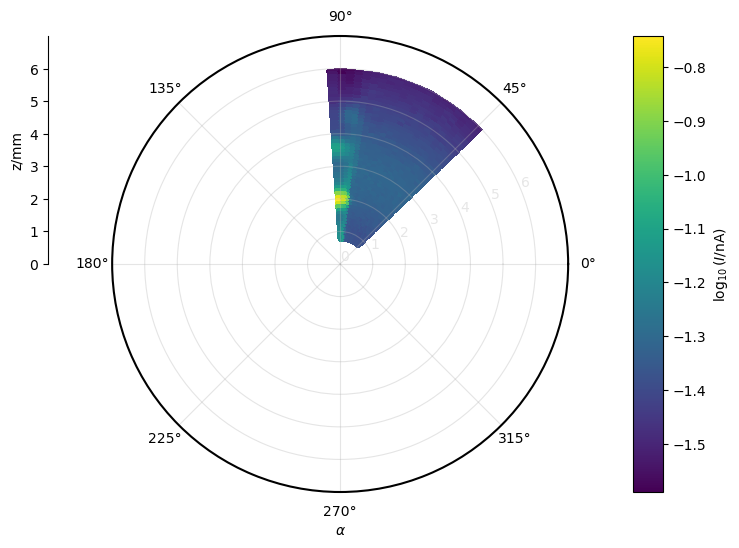

In [30]:
file_ind = np.arange(2318, 2337 + 1)
z_zero = 1.0e6
d = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=0)
d.shem_raw_plot()